 ## Technical indicators

Import packages.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
from mplfinance.original_flavor import candlestick_ohlc

Select a stock.

In [12]:
stock = 'RY.TO'

Fetch the data.

In [13]:
df = yf.download(stock, period="1y", interval="1d")

[*********************100%%**********************]  1 of 1 completed


Develop Open-High-Low-Close data for the candlestick chart.

In [14]:
copied_df = df.copy()
copied_df = copied_df.reset_index() 
copied_df['Date'] = pd.to_datetime(copied_df['Date'])
copied_df['Date'] = copied_df['Date'].apply(mdates.date2num)
ohlc_data = copied_df[['Date', 'Open', 'High', 'Low', 'Close']].values


Calculate the 20-day and 50-day Exponential Moving Averages (EMA).

In [15]:
df['20-day SMA'] = df['Close'].rolling(window=20).mean()
df['50-day SMA'] = df['Close'].rolling(window=50).mean()
df['20-day EMA'] = df['Close'].ewm(span=20, adjust=False).mean()
df['50-day EMA'] = df['Close'].ewm(span=50, adjust=False).mean()

Calculate Moving Average Convergence/Divergence (MACD) and Signal Line (SL).

In [16]:
short_ema = df['Close'].ewm(span=12, adjust=False).mean()  
long_ema = df['Close'].ewm(span=26, adjust=False).mean()  
df['MACD'] = short_ema - long_ema 
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()  
df['Histogram'] = df['MACD'] - df['Signal_Line']  

Calculate the Relative Strength Index (RSI).

In [17]:
delta = df['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
df['RSI'] = 100 - (100 / (1 + RS))

Calculate the Stochastic Oscillator.

In [18]:
df['Lowest_Low'] = df['Low'].rolling(window=14).min()
df['Highest_High'] = df['High'].rolling(window=14).max()
df['%K'] = (df['Close'] - df['Lowest_Low']) / (df['Highest_High'] - df['Lowest_Low']) * 100
df['%D'] = df['%K'].rolling(window=3).mean()
df.drop(['Lowest_Low', 'Highest_High'], axis=1, inplace=True)


Plot visualizations.

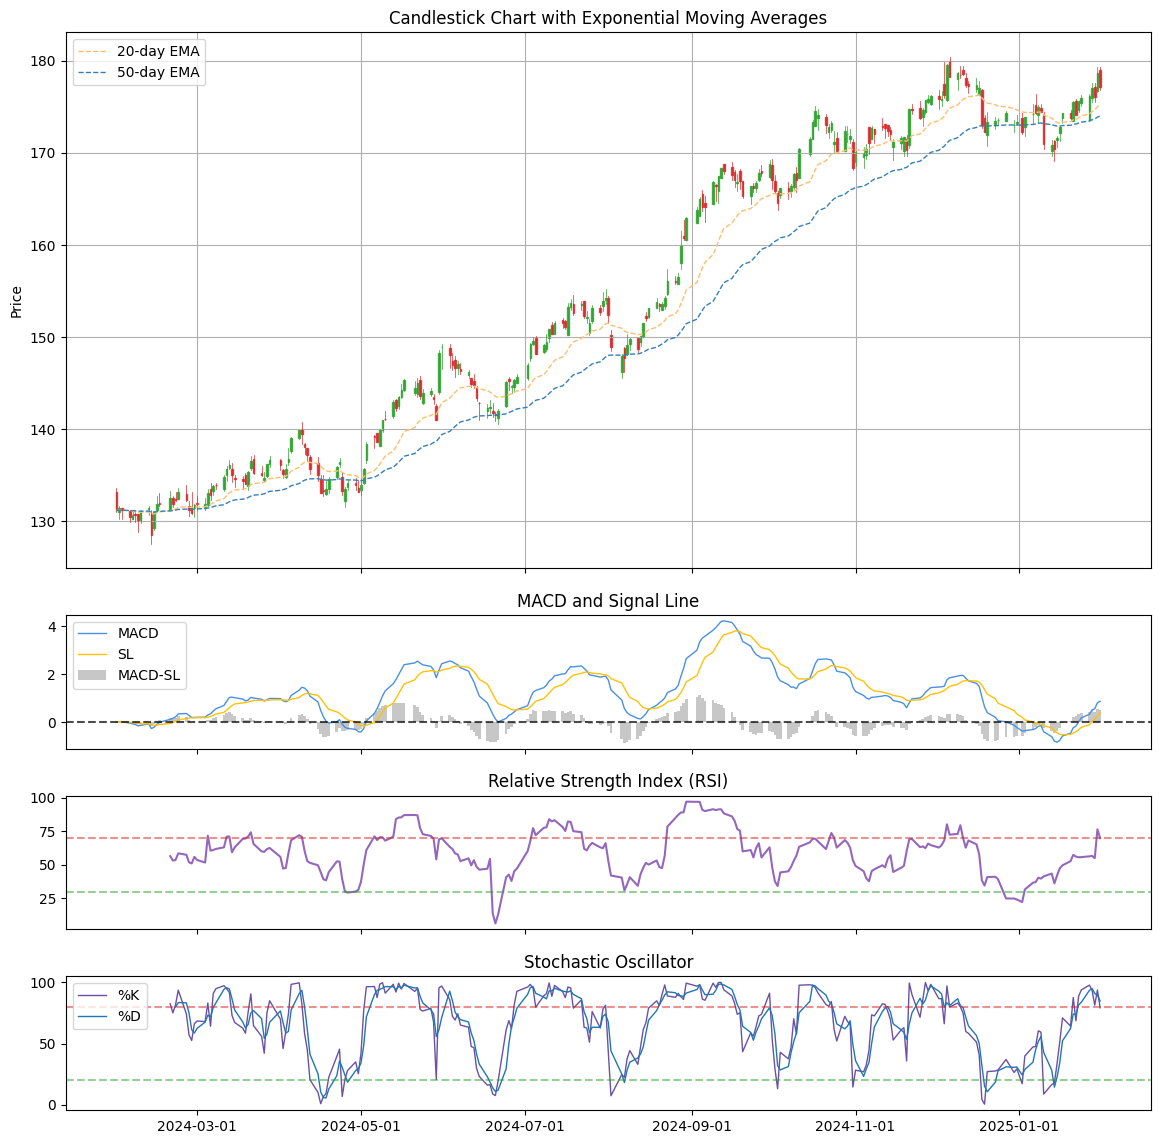

In [19]:
# Visualization layout
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 14), sharex=True, gridspec_kw={'height_ratios': [4, 1, 1, 1]})
# Candlesticks Chart with EMAs
candlestick_ohlc(ax1, ohlc_data, width=0.6, colorup='#2CA02C', colordown='#D62728', alpha=0.8)
ax1.plot(df.index, df['20-day EMA'], label='20-day EMA', color='#FDBF6F', linewidth=1, linestyle='--')
ax1.plot(df.index, df['50-day EMA'], label='50-day EMA', color='#377EB8', linewidth=1, linestyle='--')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.set_title('Candlestick Chart with Moving Averages')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)
ax1.legend()
ax1.tick_params(axis='x', rotation=0)
ax1.set_title('Candlestick Chart with Exponential Moving Averages')
# MACD
ax2.plot(df.index, df['MACD'], label='MACD', color='#4A90E2', linewidth=1)
ax2.plot(df.index, df['Signal_Line'], label='SL', color='#FFC107', linewidth=1)
ax2.bar(df.index, df['Histogram'], label='MACD-SL', color='#B0B0B0', alpha=0.7, width=1.0)
ax2.set_title('MACD and Signal Line')
ax2.axhline(0, linestyle='--', color='black', alpha=0.7)
ax2.legend(loc='upper left')
# RSI
ax3.plot(df.index, df['RSI'], label='RSI', color='#9467BD')
ax3.axhline(70, linestyle='--', alpha=0.5, color='#D62728')
ax3.axhline(30, linestyle='--', alpha=0.5, color='#2CA02C')
ax3.set_title('Relative Strength Index (RSI)')
# Stochastic Oscillator
ax4.plot(df.index, df['%K'], label='%K', color='#6A51A3', linewidth=1)
ax4.plot(df.index, df['%D'], label='%D', color='#1F77B4', linewidth=1)
ax4.axhline(80, linestyle='--', color='#D62728', alpha=0.5)
ax4.axhline(20, linestyle='--', color='#2CA02C', alpha=0.5)
ax4.set_title('Stochastic Oscillator')
ax4.legend(loc='upper left')